
# What is Normal Behaviour?
# Anomaly Detection for Software Vulnerabilities 
## An approach to evaluate a data set if it represents normal behaviour



# Modeling 

- Further problems -> Thresholding?
- Evalution of normel behaviour

# TODO:
Different Algorithms, Grid search, remeber train data is supposed to have no anomalies, test data has and we know it already 
Consider validierungsset ! Also: train with test data and then predict train
Calculate the amount of anomlous data percentage
LSTM
Anomaly scoring plotten und verhalten bewerten
notes Arbeitslaptop
Bewertung über knowledge of exploits und der Nummer die der Isolation Forest erkennt ? Confusion Matrix!

TODO: CODE aufräumen + Notebooks, Evaluation Methoden Integrieren (Brier Score), Mehrre Models + Datensets, LOCAL OUTLIER DETECTION


### Idea
Feed with dostributions to detect anomal behaviour, What is normal behaviour - from a statistical ppoint of view 
adapating the threshold, if a certain threshold is reached the data doesn't follow normal distribution








## Explorative Data Analysis

### Meta Information
- Structured data - computer resources 
Similiar to docker stats command: https://docker-py.readthedocs.io/en/stable/containers.html#docker.models.containers.Container.stats, https://docs.docker.com/config/containers/runmetrics/
    time series: datetime format 
    cpu usage:
    memory usage: 
    network received: rx (Received) bytes 
    network send: tx (Transmit) bytes 
    storage read:
    storage written:
- Unsupervised Problem - Unsupervised means no labels and a model is trained on the complete data and assumes that the majority of the instances are normal.
- was sind das für Größen, Skalierbarkeit ? verschieddene größen 
- fruterh ideas : time series data lags, autocorrelation 


In [1]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.dates as mdates
from scipy.stats import shapiro 

from helpers import *
from predict import A_Model
from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve, auc

from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

In [2]:
# Load Data
train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/train.pkl")
test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/test.pkl")
validation = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/validation.pkl")

In [3]:
print(train.shape)
print(test.shape)
print(validation.shape)

(9564, 14)
(39927, 14)
(2603, 14)


### Distributions

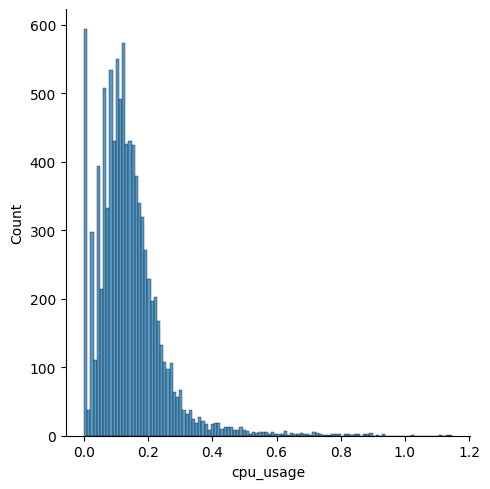

In [8]:
sns.displot(train['cpu_usage'])

### Correlation

Text(0.5, 1.0, 'Correlation between Features in Test Data')

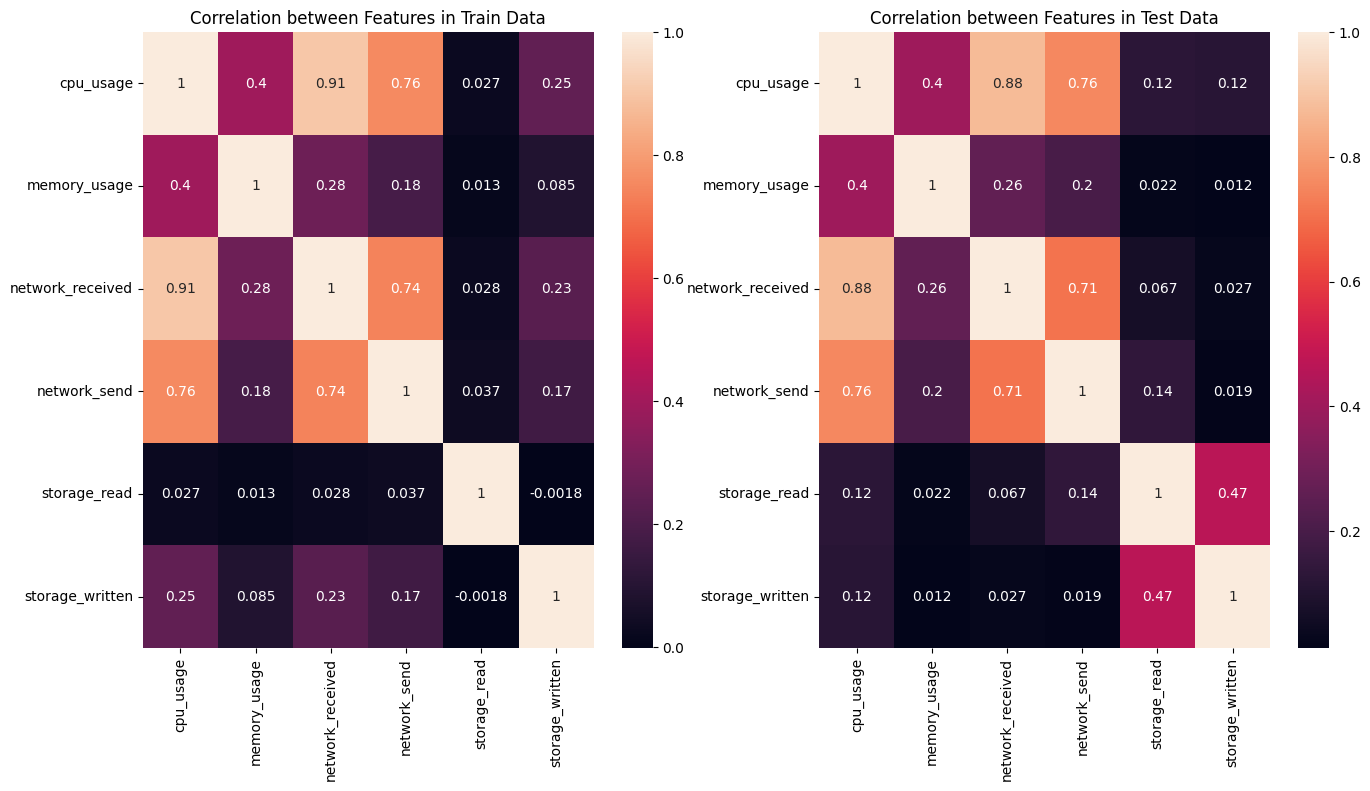

In [4]:
# Correlation of all features -> Scaling after does not make a difference
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.heatmap(train.corr(), annot=True)
plt.title("Correlation between Features in Train Data")
plt.subplot(1, 2, 2)
sns.heatmap(test.corr(), annot=True)
plt.title("Correlation between Features in Test Data")

### Time Series Data 

NameError: name 'cn_dfs_test' is not defined

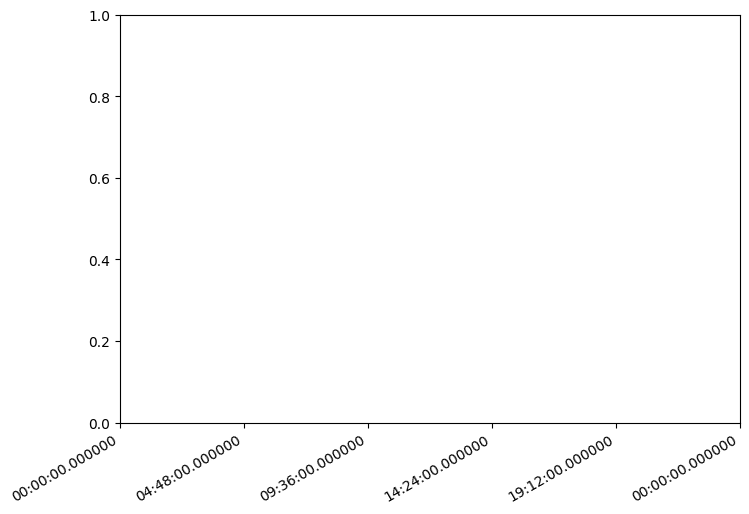

In [5]:
# Nochmal überarbeiten !
fig, ax = plt.subplots(figsize=(8,6))
xfmt = mdates.DateFormatter("%H:%M:%S.%f")
# automatically rotates the tick labels
ax.xaxis.set_major_formatter(xfmt)
fig.autofmt_xdate()
ax.plot(cn_dfs_test[0]['tvalue'], cn_dfs_test[0]['cpu_usage'])
ax.legend(cn_dfs_test[0]['container_name'])
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
xfmt = mdates.DateFormatter("%H:%M:%S.%f")
# automatically rotates the tick labels
ax.xaxis.set_major_formatter(xfmt)
fig.autofmt_xdate()
ax.plot(cn_dfs_test[2]['tvalue'], cn_dfs_test[2]['cpu_usage'])
ax.legend(cn_dfs_test[2]['container_name'])
plt.show()

#### PACF and ACF

In [51]:
to_model_columns= train.columns[0:6]
to_model_columns

Index(['cpu_usage', 'memory_usage', 'network_received', 'network_send',
       'storage_read', 'storage_written'],
      dtype='object')

### Model 

In [6]:
# Split and encode Data for modelling and evaluation
validation = encode(validation)
test = encode(test)
train = encode(train)
y_true_train = create_y_values(train)
y_true_test = create_y_values(test)
y_true_validation = create_y_values(validation)
X_train = select_columns_for_modelling(train)
X_test = select_columns_for_modelling(test)
X_validation = select_columns_for_modelling(validation)

In [7]:
# known in advance for contmination_rate
contamination_rate_train = calculate_anomalous_rate(train);print(contamination_rate_train)
contamination_rate_test = calculate_anomalous_rate(test);print(contamination_rate_test)
contamination_rate_validation = calculate_anomalous_rate(validation); print(contamination_rate_validation)

0.0
0.1532595823344213
0.0


In [8]:
A_Model(model_type='IsolationForest')

FileNotFoundError: [Errno 2] No such file or directory: 'src/model/params.yml'

In [ ]:
ca = PCA(n_components=3)  # Reduce to k=3 dimensions
#scaler = StandardScaler()
#normalize the metrics
X = train[to_model_columns]
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [ ]:
pca = PCA(2)
pca.fit(train[to_model_columns])
res=pd.DataFrame(pca.transform(train[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest Visualization for Train Data")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

# Evaluation 

### Mass Vlume Curve 
### F1 Score

### Cnfusion Matrix

In [ ]:
algorithms = [IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)]
name = ['IsolationForest']
colors = ['red']

plt.figure(figsize=(12, 6))
for a, algo in enumerate(algorithms):
    algo.fit(X_train)
    algo_train = algo.decision_function(X_train)
    algo_test = algo.decision_function(X_test)
    algo_validation = algo.decision_function(X_validation)

    # as only one class available auc does not work -> Brier Score!
    fpr_train_, tpr_train_, _ = roc_curve(y_true_train, -algo_train)
    algo_auc_train = auc(fpr_train_, tpr_train_)
    
    fpr_test_, tpr_test_, _ = roc_curve(y_true_test, -algo_test)
    algo_auc_test = auc(fpr_test_, tpr_test_)

    # as only one class available auc does not work -> Brier Score!
    fpr_validation_, tpr_validation_, _ = roc_curve(y_true_validation, -algo_validation)
    algo_auc_validation = auc(fpr_validation_, tpr_validation_)

    plt.subplot(1, 2, 1)
    plt.title('Performance on Training set')
    plt.plot(fpr_train_, tpr_train_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_train))
    
    plt.subplot(1, 2, 2)
    plt.title('Performance on Test set')
    plt.plot(fpr_test_, tpr_test_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_test))
    
    plt.subplot(1, 2, 1)
    plt.title('Performance on Validation set')
    plt.plot(fpr_validation_, tpr_validation_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_validation))
    
    
plt.subplot(1, 2, 1)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.subplot(1, 2, 2)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.subplot(1, 2, 1)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.show()